#### [ML with Python] 2. 지도 학습 알고리즘 (6-2) 신경망 모델(MLP 신경망 튜닝)
- 본 포스팅은 지도 학습 알고리즘인 신경망 모델에 관한 기본적인 내용에 관하여 다룹니다.
- 다층 퍼셉트론(`multilayer perceptrons, MLP`)
- 신경망 튜닝
- 신경망 장단점
- 신경망의 복잡도 추정

___

필요 라이브러리 import

In [20]:
import mglearn
import graphviz
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

---

#### <u>신경망 튜닝</u>

[이전 포스팅](https://jhryu1208.github.io/data/2020/11/24/ML_Neural-Network/)에서 공부한 `다층 퍼셉트론(MLP)`을 two_moons 데이터셋에 적용하며 모델을 이해해보자.

<br>

진행전 `MLP`를 구현하는 `MLPClassifier`의 신경망의 복잡도를 제어할 수 있는 매개변수에 관하여 먼저 살펴보겠다.

- `hidden_layer_sizes` 
    - 은닉충의 수와 뉴런의 갯수를 조절하는 매개변수
    - default값은 (100, )이다.
    - ex) 10개의 은닉 유닛으로 구성된 2개의 은닉층을 구성하고 싶을 경우 => hidden_layer_sizes=(10,10)
    
- `activation`
    - 활성화 함수를 지정하는 매개변수
    - 시그모이드 함수 : `logistic`<br>렐루 함수 : `relu`(default값)<br>하이퍼볼릭 탄젠트 함수 : `tanh`
        
- `alpha`
    - L2규제를 적용하기 위한 매개변수 
    - default값은 0.0001이다.

- `batch_size`, `learning_rate_init`, `max_iter` 등의 매개변수도 존재한다.<br>또한 `solver`매개변수도 있으며, 이에 관해서는 마지막에 살펴볼 예정이다.

이처럼 `MLPClassifier`는 많은 매개변수들을 가지고 있다.

<br>

이제 two_moons 데이터셋에 적용해보자.<br>
은닉 유닛의 갯수는 따로 설정하지 않았기 때문에 은닉 유닛의 수는 기본값인 100개이다.

Text(0, 0.5, 'property 1')

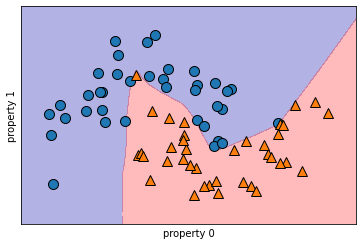

In [12]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=42)

mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("property 0")
plt.ylabel("property 1")

`MLP`신경망 모델은 이와 같이 매우 `비선형적인` 모델을 만들었으며, 비교적 매끄러운 결정 경계의 형태를 만들었다.

<br>

위에서는 은닉 유닛의 갯수를 기본값인 100으로 설정하였다. 이는 two_moons 데이터셋과 같이 작은 데이터셋에서는 과분한 크기이다. 해당 데이터셋에서는 유닛의 개수를 줄여도 다음과 같이 여전히 좋은 결과를 얻을 수 있다.

C:\Users\jhryu\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Text(0, 0.5, 'property 1')

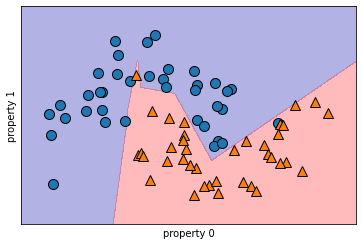

In [13]:
# 은닉 유닛을 10개로 감소시켰다.
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("property 0")
plt.ylabel("property 1")

<br>

<u>더 매끄러운 결정 경계를 원할 경우</u> 다음과 같은 매개변수 조정을 생각할 수 있다.
- 은닉 유닛 추가
- 은닉층 추가
- tanh 함수 사용

Text(0, 0.5, 'property 1')

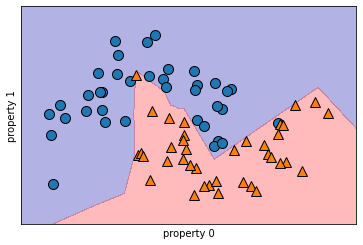

In [15]:
# 10개의 유닛으로 된 두 개의 은닉층
mlp = MLPClassifier(solver='lbfgs', random_state=0,
hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("property 0")
plt.ylabel("property 1")

C:\Users\jhryu\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Text(0, 0.5, 'property 1')

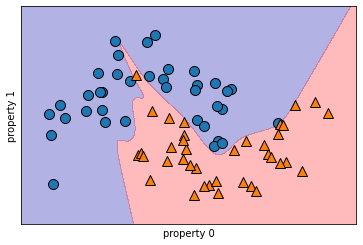

In [16]:
# tanh 활성화 함수가 적용
# 10개의 유닛으로 된 두 개의 은닉층
mlp = MLPClassifier(solver='lbfgs', activation='tanh',
                    random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("property 0")
plt.ylabel("property 1")

<br>

`MLP`신경망 모델도 `리지 회귀`에서 처럼 `L2패널티`를 사용해 가중치를 0에 가깝게 감소시켜 모델의 복잡도를 제어할 수 있다. `MLPClassifier`에서 이와 같은 역할을 하는 매개변수는 앞에서 보았던 `alpha(기본값 : 0.0001)`이다. 다음 그림은 two_moons데이터셋에 유닛이 각각 10개와 100개인 은닉층 2개를 사용했을 떄 다른 alpha값이 미치는 영향을 보여준다. `alpha`매개변수가 커질수록 제어력이 강해져서 복잡도가 낮아지는 것을 확인할 수 있다.

C:\Users\jhryu\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\jhryu\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


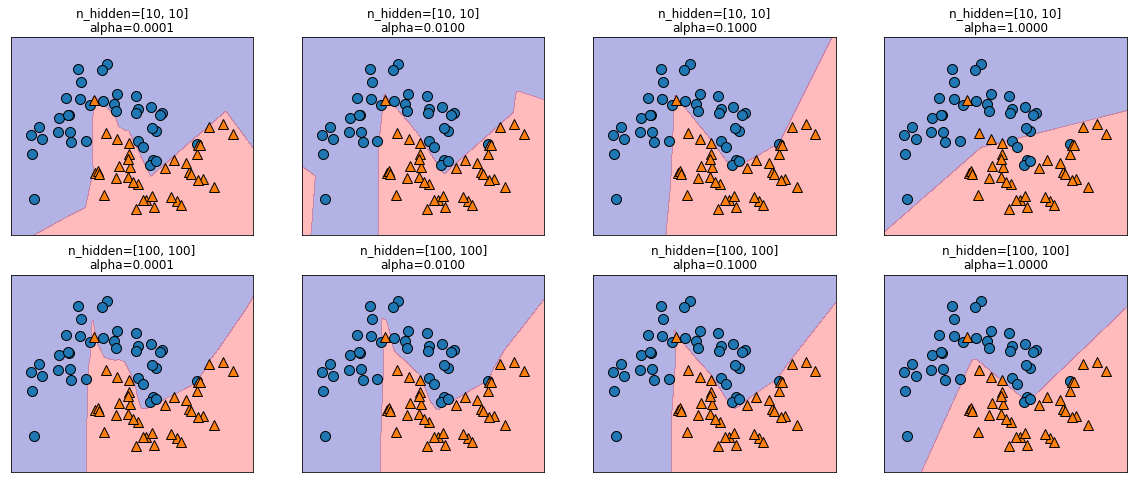

In [17]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0,
                            hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],
                            alpha=alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
        ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format(
                      n_hidden_nodes, n_hidden_nodes, alpha))

<br>

또한, 신경망에서는 학습을 진행하기 전에 `가중치`를 <b>무작위</b>로 설정한다. 이 무작위한 초기화는 모델의 학습에 영향을 준다. 따라서, 같은 매개변수를 적용하더라도 초깃값이 다르면 모델이 많이 달라질 수 있다. <b>신경망이 클 경우</b>이런 문제는 크지 않지만, <b>신경망이 작을 경우</b>(ex.two_moons 데이터셋)과 같은 경우 같은 매개변수를 가져도 다른 결과를 보여준다.

<br>

다음은 같은 매개변수에서 무작위로 다른 초기값이 주어진 two_moons 데이터셋에서의 학습결과이다. 결정 경계가 모두 다른 양상을 보여주고 있는 것을 확인할 수 있다.

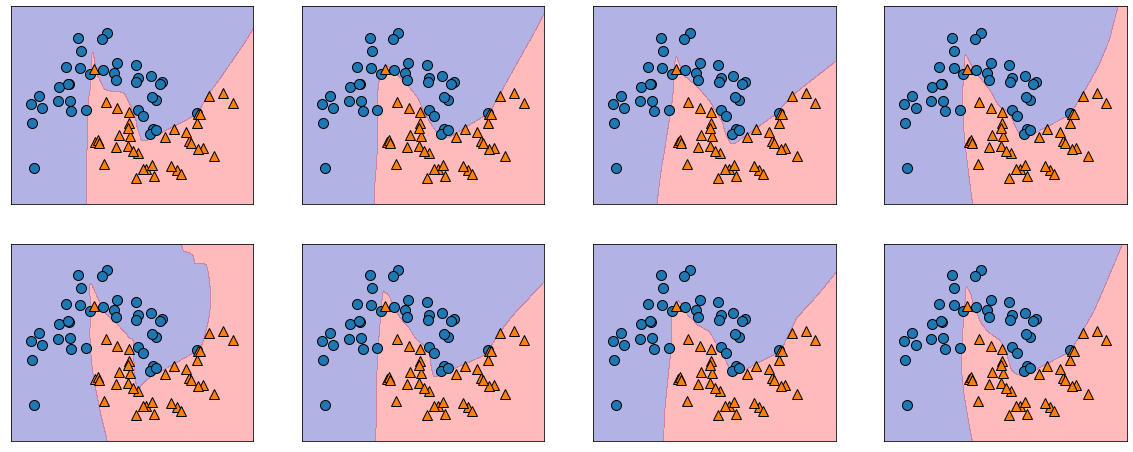

In [18]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs', random_state=i,
                        hidden_layer_sizes=[100, 100])
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)

<br>

신경망을 더 잘 이해하기 위해 실제 데이터셋인 유방암 데이터셋에 `MLPClassifier`를 적용해보자

In [21]:
cancer = load_breast_cancer()
print("유방암 데이터의 특성별 최댓값:\n{}".format(cancer.data.max(axis=0)))

유방암 데이터의 특성별 최댓값:
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print("훈련 세트 정확도: {:.2f}".format(mlp.score(X_train, y_train)))
print("테스트 세트 정확도: {:.2f}".format(mlp.score(X_test, y_test)))

훈련 세트 정확도: 0.94
테스트 세트 정확도: 0.92


위에서 확인할 수 있는 것 처럼, `MLP`의 정확도는 꽤 높지만 지금까지 학습한 다른 모델만큼은 아니다. <br> [이전에](https://jhryu1208.github.io/data/2020/11/22/ML_SVM/) `SVC`와 같은 경우 `데이터의 스케일`이 영향을 끼쳤었다. <u>마찬가지로 `신경망`도 모든 입력 특성을 평균은 0, 분산은 1이 되도록 변형하는 것이 좋다.</u>

<br>

그럼 해당 조건에 맞도록 데이터의 스케일을 조정하고, 정확도를 확인해보자

In [23]:
# 훈련 세트 각 특성의 평균을 계산합니다.
mean_on_train = X_train.mean(axis=0)
# 훈련 세트 각 특성의 표준 편차를 계산합니다.
std_on_train = X_train.std(axis=0)

# 데이터에서 평균을 빼고 표준 편차로 나누면
# 평균 0, 표준 편차 1인 데이터로 변환됩니다.
X_train_scaled = (X_train - mean_on_train) / std_on_train
# (훈련 데이터의 평균과 표준 편차를 이용해) 같은 변환을 테스트 세트에도 합니다.
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

훈련 세트 정확도: 0.991
테스트 세트 정확도: 0.965


C:\Users\jhryu\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


스케일을 조정하니 결과가 매우 좋아졌으며 다른 모델의 성능 못지않는다. 하지만, `Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.`라며 최대 반복 횟수에 도달하였다는 오류가 출력되었다. 이는 모델을 학습시키는 `adam`알고리즘에 관련된 것으로 이 경고가 나오면 반복 횟수를 늘려야한다. 반복 횟수는 앞에서 확인하였던 매개변수인 `max_iter`를 다음과 같이 조정해야한다.

In [25]:
mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.972


오류가 없어질 뿐더러, 반복 횟수를 늘려서 훈련 세트와 테스트 세트의 성능이 더욱 좋아졌다. 하지만, 훈련 세트와 테스트 세트 사이에 성능 차이가 확인되기에 일반화 성능을 더 올리고자 `alpha`매개변수 기본값(default = 0.001)에서 1로 증가시켜 모델의 복잡도를 좀 더 낮춰보자.

In [26]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.972


더 좋은 결과를 확인할 수 있었다!


<br>

모델의 가중치를 확인해보면 어떤 특성이 학습되었는지 알 수 있다. 아래의 그림은 `입력층`과 `은닉충` 사이에 위치한 학습된 가중치를 보여준다. 이 그림의 행은 30개의 입력 특성과 100개의 은닉 유닛에 해당한다. 밝은 색은 큰 양수 값, 어두운 색은 음수 값을 의미한다.

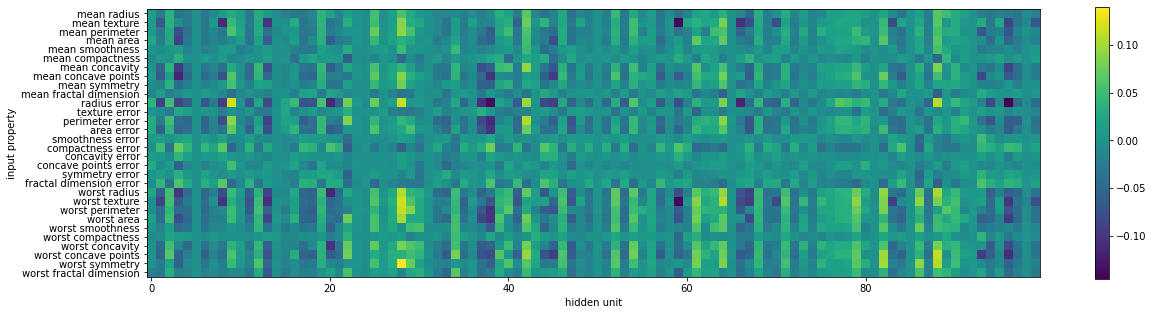

In [28]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("hidden unit")
plt.ylabel("input property")
plt.colorbar()

모든 은닉 유닛에서 `작은 가중치`를 가진 특성은 `덜 중요한` 모델이라는 것을 추론할 수 있다. 예를 들어, "smoothness error”와 “fractal dimension error” 사이에 있는 특성과 “mean smoothness”와 “mean compactness”가 다른 특성들보다 가중치가 낮다. 이 특성들은 덜 중요하거나 신경망에게 적절하게 입력되지 않았을 수도 있다는 의미이다.

<br>

`은닉층`과 `출력층`사이의 가중치도 시각화 할 수 있지만, 해석은 더 어렵다.

<br>

---

#### <u>장단점</u>

- <b>장점</b>
    - 대량의 데이터에 내재된 정보를 잡아내고 <u>매우 복잡한 모델</u>을 만들 수 있다.
    - 충분한 연산 시간과 데이터를 주고 <u>매개변수를 세심하게 조정</u>하면 종종 다른 머신러닝 알고리즘을 뛰어넘는 성능을 보여준다.
    
- <b>단점</b>
    - 종종 학습이 오래 걸린다.
    - `데이터 전처리`에 주의해야한다! (`SVM`과 비슷하게 모든 특성이 같은 스케일을 가진 동질의 데이터에서는 잘 작동한다. 다른 종류의 특성이라면 `결정 트리`가 더 효과적일 수 있다.)
    - 신경망 매개변수 튜닝은 예술에 가까운 일이다......

<br>

---

#### <u>신경망의 복잡도 추정</u>

<b>신경망에서 가장 중요한 매개변수</b>는 `은닉층의 개수`와 `은닉층의 유닛 수`이다.<br>
처음엔 1~2개의 `은닉층`에서 부터 시작해서 늘려나가야 한다.<br>
`은닉층의 유닛 수`의 경우 보통 입력 특성의 수와 비슷하게 설정한다. (수천을 넘는 일은 거의 없다.)

<br>

<u>`신경망`의 모델 복잡도에 관해 도움이 될 수 있는 측정치</u>는 `학습된 가중치`와 `계수의 수`이다.

<br>

<b>신경망의 매개변수를 조정하는 일반적인 방법</b>은 다음과 같다.
- STEP 1 : 충분히 과대적합되어서 문제를 해결할만한 큰 모델을 만든다.
- STEP 2 : 신경망 구조를 줄이거나 규제 강화를 위해 `alpha`값을 증가시켜 일반화 성능을 향상시킨다.

<br>

위에서 보았던 예제들에서는 모델의 매개변수 구성에 초점을 맞추어 진행했었다.<br>
이 중 <b>`solver` 매개변수</b>을 통해서도 <u>모델을 학습시키는 방법</u> 또는 <u>매개변수 학습에 사용하는 알고리즘</u>을 지정할 수 있다. `solver`매개변수에는 쉽게 사용할 수 있는 다음의 두 옵션이 있다.

- `adam`
    - default값 이다.
    - 대부분의 경우에 잘 작동하지만 데이터의 스켈에 조금 민감하다.<br>(따라서, 데이터의 평균을 0 분산을 1로 조정하는 것이 중요하다.)
    - `MLP`를 처음 사용할 때 추천!
- `lbfgs`
    - 안정적이다.
    - 규모가 큰 모델이나 대량의 데이터셋에서는 시간이 오래 걸린다.
    - `MLP`를 처음 사용할 때 추천!
- `sgd`
    - 딥러닝에서 많이 사용된다.
    - 해당 옵션에서는 다른 여러 매개변수와 함께 튜닝하여 최선의 결과를 만들 수 있다.

<br>

---

### References

- 안드레아스 뮐러, 세라 가이도, 『파이썬 라이브러리를 활용한 머신러닝』, 박해선, 한빛미디어(2017)
- [마크팸:공학,해석,코딩블로그](https://machfam.com/16450)